<a href="https://colab.research.google.com/github/cgoeser1/MSDS422_course_assignments/blob/main/AmesHousing(2021SEP26).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conduct EDA on the dataset as follows:
* Provide appropriate descriptive statistics and visualizations to help understand the **marginal distribution** of the dependent variable.
* Investigate **missing data** and **outliers**.
* Investigate at least **three potential predictors** of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.
* Engage in **feature creation** by splitting, merging, or otherwise generating a new predictor.
* Using the dependent variable, perform both **min-max and standard scaling** in Python.


Import all relevant packages.

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

Clone the repository, so all files are in the same folder.  Should be accessible to all collaborators.

In [2]:
!git clone https://github.com/cgoeser1/MSDS422_course_assignments


Cloning into 'MSDS422_course_assignments'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


Change the Colab working directory to that just cloned from GitHub.
Confirm the working directory.

In [3]:
os.chdir('/content/MSDS422_course_assignments')
os.getcwd()

'/content/MSDS422_course_assignments'


Load train and test files into Pandas dataframes.

In [4]:

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Check the number of observations for each feature in the 'train' set.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Look at the first five rows of data within the 'train' data set.

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Marginal distribution of the SalePrice.**

In [9]:
## Do a quick statistical summary of the train data set SalePrice. -cpg
print(f"Mean Housing Price: ${train.SalePrice.mean():,.2f}.")
print(f"Median Housing Price: ${train.SalePrice.median():,.2f}.")

Mean Housing Price: $180,921.20.
Median Housing Price: $163,000.00.


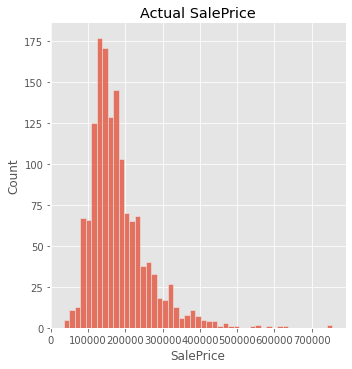

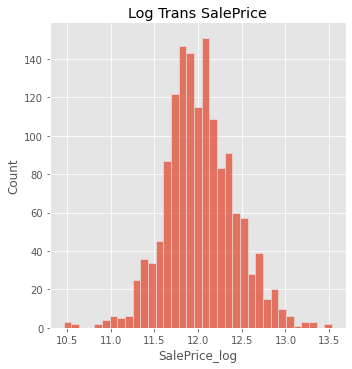

In [13]:
## Count the SalesPrice observations and plot, looking at the SalePrice and log-transformed SalePrice. 
## In SalePrice, we see right skew, due to a tail of more expensive houses. 
## We then try to normalize the distribution with a log transformation.
train['SalePrice_log'] = np.log(train.SalePrice)
sns.displot(train.SalePrice).set(title='Actual SalePrice')
sns.displot(train.SalePrice_log).set(title='Log Trans SalePrice')



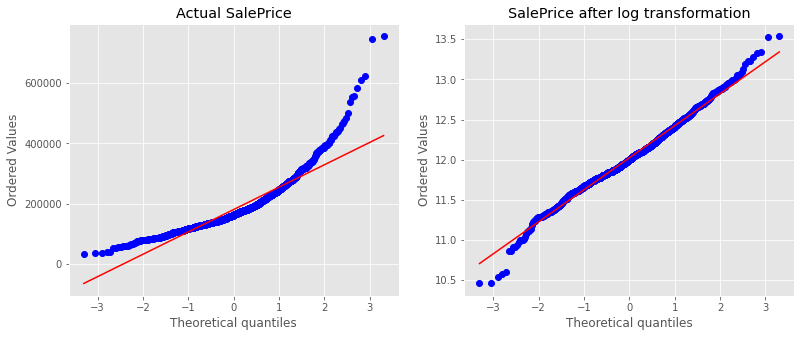

<Figure size 432x288 with 0 Axes>

In [11]:
## Fit the SalePrice and log-transformed SalePrice to a normal curve.  
## 'probplot' plots data against a normal distribution.
figure = plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
stats.probplot(train.SalePrice, plot = plt)
plt.title('Actual SalePrice')
plt.subplot(1,2,2)
stats.probplot(train.SalePrice_log, plot = plt)
plt.title('SalePrice after log transformation')
plt.show()
plt.savefig('SalePrice.jpg')

## **Investigate Outliers**

In [ ]:
## Check for Outliers. It looks like $350,000 is the max of IQR, 
## so it may make sense to split into two sets ('low' and 'high') based on this price.
train_low = train[train.SalePrice<350000]
train_hi = train[train.SalePrice>=350000]

In [ ]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(20,7), sharey=False)
sns.boxplot(y=train['SalePrice'], data=train, ax=ax0).set(title='All SalePrice')
sns.boxplot(y=train_low['SalePrice'], data=train_low, ax=ax1).set(title='SalePrice - Low')
sns.boxplot(y=train_hi['SalePrice'], data=train_hi, ax=ax2).set(title='SalePrice - High')

### **Investigate missing data.**

In [ ]:
## count the number of features.
print(len(train.columns))
train.info()

In [ ]:
## Identify the features missing values, so we can determine whether to drop the feature or impute the data.
missing = train.isna().sum()
missing = missing[missing>0]
missing_perc = missing/train.shape[0]*100
droplist = pd.DataFrame([missing, missing_perc], index = ['missing_num', 'missing_perc']).T
droplist = droplist.sort_values(by = 'missing_perc', ascending = False)

In [ ]:
## Show those features and percentage of missing data.
print(len(droplist))
print(droplist)


In [ ]:
## Fill records with 'missing' LotFrontage and MasVnrArea with '0' value. -cpg
train['LotFrontage'] = train['LotFrontage'].fillna(0)
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
## Drop the single record missing Electrical data. -cpg
train.drop(train[train.Electrical.isna()].index, axis = 0, inplace = True)
## Fill records with 'missing' Pool Quality and Alley with 'NA' value. -cpg
train['PoolQC'] = train['PoolQC'].fillna('NA')
train['Alley'] = train['Alley'].fillna('NA')

In [ ]:
## check again remaining features that are missing data.
missing = train.isna().sum()
missing = missing[missing>0]
missing_perc = missing/train.shape[0]*100
droplist = pd.DataFrame([missing, missing_perc], index = ['missing_num', 'missing_perc']).T
droplist = droplist.sort_values(by = 'missing_perc', ascending = False)
print(len(droplist))
print(droplist)


In [ ]:
## Remove features that have significant % of missing values.  
## Likely, these are colinear with other features. -cpg
droplist2=droplist.index.tolist()
droplist2

In [ ]:
## Drop those features.
train.drop(droplist2, axis = 1, inplace = True)

In [ ]:
## Check remaining features. All have 1459 observations.
## 68 features is still a lot. How to identify those most likely to predict sale price? -cpg
train.info()

### **Engage in feature creation by splitting, merging, or otherwise generating a new predictor.**

In [ ]:
# find the Age of the house at the sell year. -AA
train['HouseAge'] = train['YrSold']-train['YearBuilt']
train.info()

In [ ]:
# Creat a correlation heatmap to find out which 4 variables -AA (Chad added sq ft)
# "HouseAge", "OverallQual", "LotArea" is more correlated with "SalePrice" 
#create a df for correlation 
columns = ['1stFlrSF', 'HouseAge','OverallQual','LotArea','SalePrice']
df_corr = train[columns]
# setting up the heatmap
corrmat = df_corr.corr()

# mask similar squares
mask = np.triu(np.ones_like(corrmat,dtype=bool))

# set the figure size
f, ax = plt.subplots(figsize=(9, 6))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5, mask=mask)
plt.title('Heatmap Sale Price')

### **Using the dependent variable, perform both min-max and standard scaling in Python**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# preform standared scaling transformation on house prices  -AA
x = train.iloc[: , -1:]
standard_scaler = StandardScaler().fit(x)

In [ ]:
# Transform the values -AA
standard_scaled_price = standard_scaler.transform(x)
standard_scaled_price

In [ ]:
# preform Min-Max scaling transformation on house prices  -AA
min_max_scaler = MinMaxScaler().fit(x)
MinMax_scaled_price = min_max_scaler.transform(x)
MinMax_scaled_price

In [ ]:
# Add the new scaled values to the dataframe -AA
train['StandaredScaled_Prices']= standard_scaled_price
train['MinMaxScaled_Prices']= MinMax_scaled_price
# print new dataframe info
train.info()